Course: INF2178

Assignment: Assignment 2

Name: Ruiying Wang

Student number: 1003059762

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

Exploratory data

In [78]:
#load data file
df = pd.read_excel("INF2178_A2_data.xlsx")
df=df.rename(columns={'IGSPACE':'Infant','TGSPACE':'Toddler','PGSPACE':'Preschool','KGSPACE':'Kindergarten','SGSPACE':'School_Age','TOTSPACE':'Total'})


In [79]:
#Create new column that calculate % of spaces by age group across all Child care centre

def calculate_percentage(df, age_group_columns):

  for column in age_group_columns:
    df[column+'_pct']=round(100*df[column]/df['Total'],2)

age_group_columns =['Infant','Toddler','Preschool','Kindergarten','School_Age']
calculate_percentage(df,age_group_columns)

df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,Infant,...,School_Age,Total,subsidy,cwelcc_flag,Unnamed: 17,Infant_pct,Toddler_pct,Preschool_pct,Kindergarten_pct,School_Age_pct
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,...,60,164,Y,Y,0.000746,0.00,12.20,19.51,31.71,36.59
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,...,45,83,Y,Y,NaN,0.00,0.00,14.46,31.33,54.22
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,...,50,102,Y,Y,NaN,0.00,9.80,15.69,25.49,49.02
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,...,0,65,Y,Y,NaN,15.38,23.08,61.54,0.00,0.00
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,...,0,26,Y,Y,NaN,0.00,38.46,61.54,0.00,0.00


*One*-Way ANOVA

Research question 1: Is there a significant difference in the percentage of spaces allocated to different age groups across different centres?

In [80]:
#melt the dataframe
df_melt = pd.melt(df.reset_index(),id_vars=['index'],value_vars=['Infant_pct','Toddler_pct','Preschool_pct','Kindergarten_pct','School_Age_pct'])

#replace column names
df_melt.columns=["index","age_group","value"]
df_melt.head()

,index,age_group,value
0,0,Infant_pct,0.00
1,1,Infant_pct,0.00
2,2,Infant_pct,0.00
3,3,Infant_pct,15.38
4,4,Infant_pct,0.00


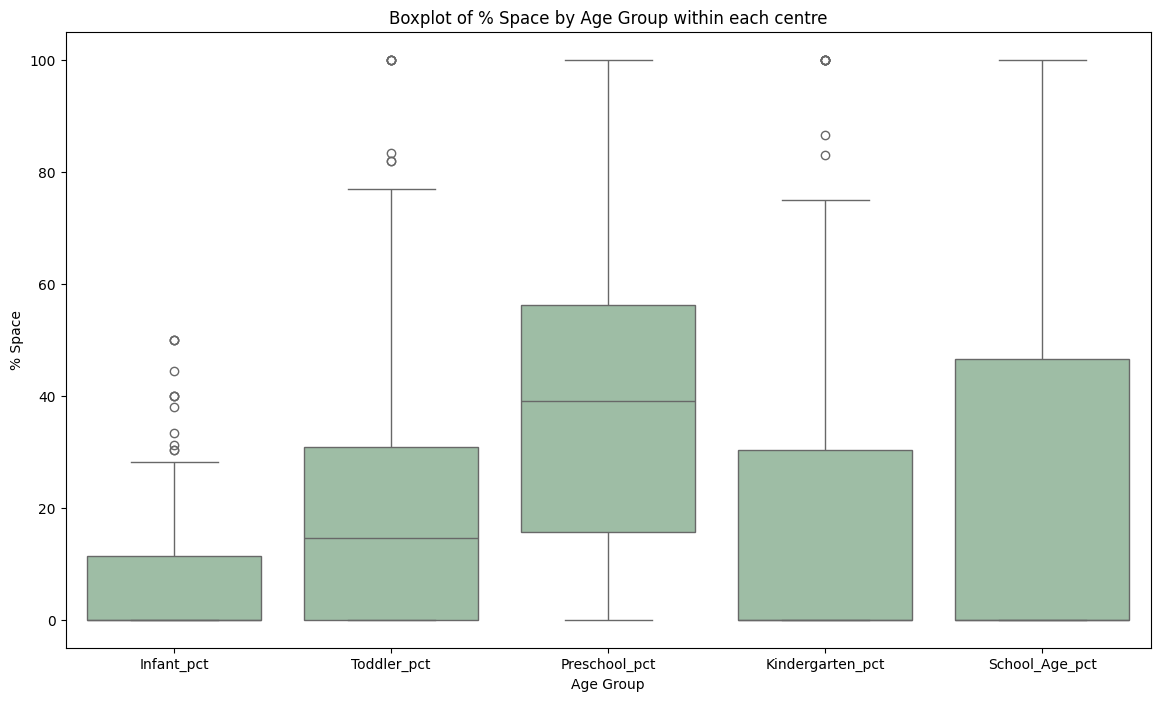

In [81]:
#Plot Boxplot to display data distribution by age group within each centre .
plt.figure(figsize=(14,8))
boxChart = sns.boxplot(x='age_group',y='value',data=df_melt,color ='#99c2a2')
plt.xlabel("Age Group")
plt.ylabel("% Space")
plt.title("Boxplot of % Space by Age Group within each centre")
plt.show()

In [82]:
#OLS model
model = ols('value ~ C(age_group)',data = df_melt).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

res = stat()
res.anova_stat(df = df_melt,res_var='value',anova_model='value ~ C(age_group)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(age_group),4.0,6.289268e+05,157231.695739,328.251212,8.847797e-253
Residual,5310.0,2.543480e+06,478.998067,NaN,NaN


In [83]:
#Post hoc test via Tukey's HSD
res = stat()
res.tukey_hsd(df=df_melt,res_var='value',xfac_var='age_group',anova_model='value ~ C(age_group)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Infant_pct,Toddler_pct,11.992135,9.401717,14.582554,17.864723,0.001000
1,Infant_pct,Preschool_pct,32.681072,30.090654,35.271491,48.685098,0.001000
2,Infant_pct,Kindergarten_pct,8.790433,6.200014,11.380852,13.095136,0.001000
3,Infant_pct,School_Age_pct,17.990216,15.399798,20.580635,26.800083,0.001000
4,Toddler_pct,Preschool_pct,20.688937,18.098518,23.279356,30.820376,0.001000
5,Toddler_pct,Kindergarten_pct,3.201703,0.611284,5.792122,4.769587,0.006723
6,Toddler_pct,School_Age_pct,5.998081,3.407662,8.588500,8.935360,0.001000
7,Preschool_pct,Kindergarten_pct,23.890640,21.300221,26.481059,35.589963,0.001000
8,Preschool_pct,School_Age_pct,14.690856,12.100437,17.281275,21.885015,0.001000
9,Kindergarten_pct,School_Age_pct,9.199784,6.609365,11.790202,13.704947,0.001000


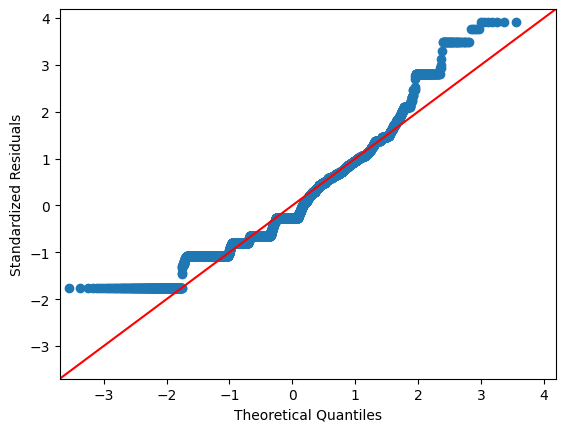

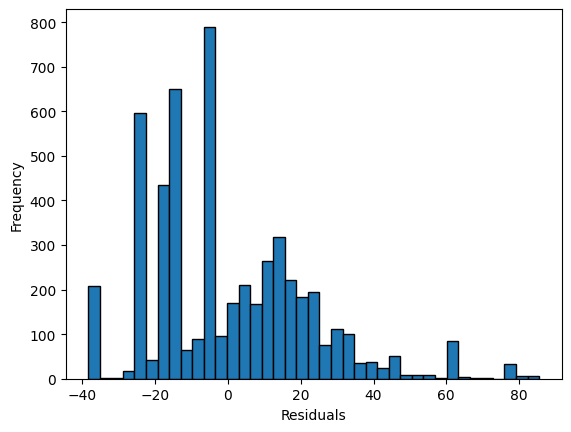

In [84]:
#ANOVA Assumption Check
#Assumption 1: Residuals are normally distributed

#Q-Q plot
sm.qqplot(res.anova_std_residuals,line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

#Histogram
plt.hist(res.anova_model_out.resid, bins ='auto',histtype='bar',ec='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [85]:
#Shapiro Wilk test
w,pvalue = stats.shapiro(model.resid)
test_result = pd.DataFrame({'Statistical result':[w],'P-value':[pvalue]})
test_result

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Statistical result,P-value
0,0.947355,5.517669e-40


In [86]:
#Assumption 2: homoegeneous variance via Levene's test as sample is not normally distributed.
res.levene(df=df_melt, res_var ='value',xfac_var = 'age_group')
res.levene_summary

,Parameter,Value
0,Test statistics (W),186.6065
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


**Two-way ANOVA**

Research Question 2:
How do age group and subsidy type impact the distribution of spaces in different centers

In [87]:
df2_melt = pd.melt(df,id_vars=['subsidy'],value_vars=['Infant_pct','Toddler_pct','Preschool_pct','Kindergarten_pct','School_Age_pct'])
df2_melt.columns =['subsidy','age_group','value']
df2_melt.head()

,subsidy,age_group,value
0,Y,Infant_pct,0.00
1,Y,Infant_pct,0.00
2,Y,Infant_pct,0.00
3,Y,Infant_pct,15.38
4,Y,Infant_pct,0.00


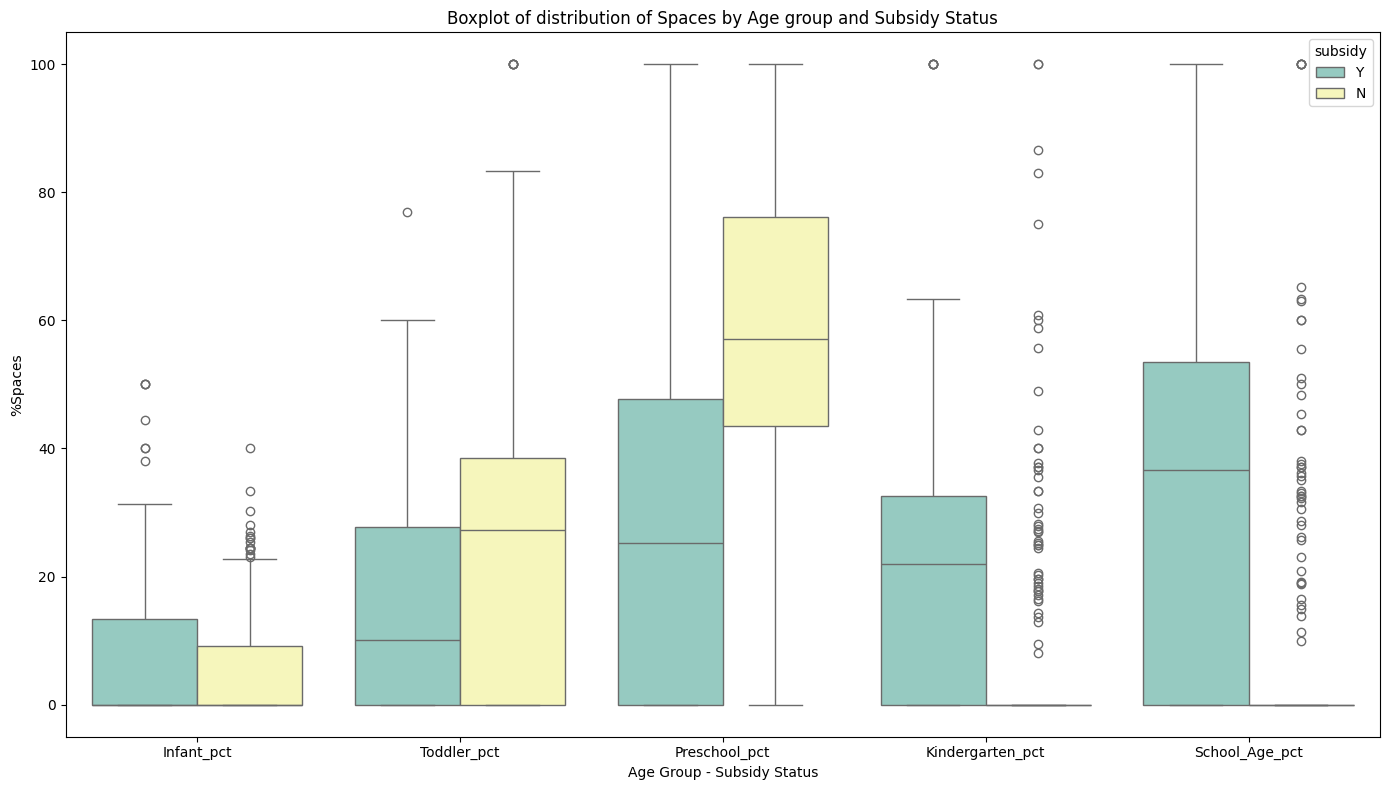

In [88]:
#Boxplot for % space by age group and fee subsidy contract in different centers.
plt.figure(figsize=(14,8))
sns.boxplot(x='age_group',y='value',hue='subsidy',data=df2_melt,palette="Set3")
plt.xlabel("Age Group - Subsidy Status")
plt.ylabel("%Spaces")
plt.title('Boxplot of distribution of Spaces by Age group and Subsidy Status')
plt.tight_layout()
plt.show()

In [89]:
#OLS model
model2=ols('value~C(subsidy)+C(age_group)+C(subsidy):C(age_group)',data=df2_melt).fit()
anova_table2=sm.stats.anova_lm(model2,typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(subsidy),2.740224e-05,1.0,7.004927e-08,9.997888e-01
C(age_group),6.289268e+05,4.0,4.019367e+02,7.007901e-303
C(subsidy):C(age_group),4.682420e+05,4.0,2.992457e+02,2.058506e-232
Residual,2.075238e+06,5305.0,NaN,NaN


In [90]:
#ANOVA table
res2 = stat()
res2.anova_stat(df=df2_melt, res_var='value', anova_model='value ~ C(age_group)+C(subsidy)+C(age_group):C(subsidy)')
res2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(age_group),4.0,6.289268e+05,157231.695739,4.019367e+02,7.007901e-303
C(subsidy),1.0,2.740224e-05,0.000027,7.004927e-08,9.997888e-01
C(age_group):C(subsidy),4.0,4.682420e+05,117060.501647,2.992457e+02,2.058506e-232
Residual,5305.0,2.075238e+06,391.185245,NaN,NaN


<Figure size 1400x800 with 0 Axes>

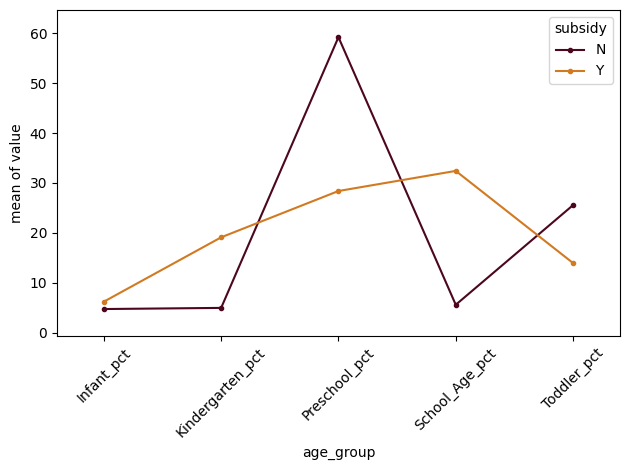

In [91]:
#Interaction plot display mean percentage values for different age groups split by subsidy status
plt.figure(figsize=(14,8))
fig = interaction_plot(x=df2_melt['age_group'],trace=df2_melt['subsidy'],response=df2_melt['value'],colors=['#4c061d','#d17a22'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [92]:
#post hoc test
res2.tukey_hsd(df=df2_melt, res_var='value',xfac_var='subsidy',anova_model='value ~ C(subsidy) + C(age_group) + C(subsidy):C(age_group)')
res2.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,0.000153,-1.135768,1.136075,0.000374,0.9


In [93]:
#post hoc test
res2.tukey_hsd(df=df2_melt,res_var='value',xfac_var='age_group',anova_model='value ~ C(subsidy) + C(age_group) + C(subsidy):C(age_group)')
res2.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Infant_pct,Toddler_pct,11.992135,9.651173,14.333098,19.768418,0.001000
1,Infant_pct,Preschool_pct,32.681072,30.340110,35.022035,53.873067,0.001000
2,Infant_pct,Kindergarten_pct,8.790433,6.449470,11.131395,14.490576,0.001000
3,Infant_pct,School_Age_pct,17.990216,15.649254,20.331179,29.655946,0.001000
4,Toddler_pct,Preschool_pct,20.688937,18.347974,23.029900,34.104648,0.001000
5,Toddler_pct,Kindergarten_pct,3.201703,0.860740,5.542665,5.277842,0.001799
6,Toddler_pct,School_Age_pct,5.998081,3.657118,8.339044,9.887528,0.001000
7,Preschool_pct,Kindergarten_pct,23.890640,21.549677,26.231602,39.382491,0.001000
8,Preschool_pct,School_Age_pct,14.690856,12.349893,17.031819,24.217121,0.001000
9,Kindergarten_pct,School_Age_pct,9.199784,6.858821,11.540746,15.165370,0.001000


In [94]:
#post hoc test
res2.tukey_hsd(df=df2_melt,res_var='value',xfac_var=['subsidy','age_group'], anova_model='value ~ C(subsidy) + C(age_group) + C(subsidy):C(age_group)')
res2.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Y, Infant_pct)","(Y, Toddler_pct)",7.741588,4.437682,11.045494,10.488202,0.001
1,"(Y, Infant_pct)","(Y, Preschool_pct)",22.191323,18.887417,25.495229,30.064514,0.001
2,"(Y, Infant_pct)","(Y, Kindergarten_pct)",12.904262,9.600356,16.208168,17.482525,0.001
3,"(Y, Infant_pct)","(Y, School_Age_pct)",26.222897,22.918991,29.526803,35.526437,0.001
4,"(Y, Infant_pct)","(N, Infant_pct)",1.475281,-2.625530,5.576092,1.610289,0.900
